In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scienceplots

In [2]:
## Set graphing properties

# matplotlib.rcParams['font.sans-serif'] = ['Arial'] # Helvetica
# plt.rcParams["figure.figsize"] = (16,7)

# SMALL_SIZE = 16
# MEDIUM_SIZE = 18
# BIGGER_SIZE = 20

# plt.rcParams['axes.facecolor']='white'
# plt.rcParams['savefig.facecolor']='white'
# plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use(['ieee'])

In [3]:
class ODE_solvers:
    def __init__(self, f, t0, x0, h, n):
        self.f = f
        self.t0 = t0
        self.x0 = x0
        self.h = h
        self.n = n

    # Euler method for solving ODE
    def euler(self):
        t = np.zeros(self.n+1)
        x = np.zeros(self.n+1)
        t[0] = self.t0
        x[0] = self.x0
        for i in range(self.n):
            x[i+1] = x[i] + self.h * self.f(t[i], x[i])
            t[i+1] = t[i] + self.h
        return t, x

    # Heun method for solving ODE
    def heun(self):
        t = np.zeros(self.n+1)
        x = np.zeros(self.n+1)
        t[0] = self.t0
        x[0] = self.x0
        for i in range(self.n):
            x[i+1] = x[i] + self.h/2 * (self.f(t[i], x[i]) + self.f(t[i] + self.h, x[i] + self.h * self.f(t[i], x[i])))
            t[i+1] = t[i] + self.h
        return t, x

    # Runge-Kutta-2 method for solving ODE
    def rk2(self):
        t = np.zeros(self.n+1)
        x = np.zeros(self.n+1)
        t[0] = self.t0
        x[0] = self.x0
        for i in range(self.n):
            k1 = self.f(t[i], x[i])
            k2 = self.f(t[i] + self.h/2, x[i] + self.h/2 * k1)
            x[i+1] = x[i] + self.h * k2
            t[i+1] = t[i] + self.h
        return t, x

In [13]:
# Function to solve
def f1(t, x):
    return -4*x*np.sin(t)

# Exact solution of ODE is x(t) = e^(4*cos(t) - 1)
def exact1(t):
    return np.exp(4*(np.cos(t) - 1))

# Initial conditions x(0) = 1
t0 = 0
x0 = 1
tn = 8

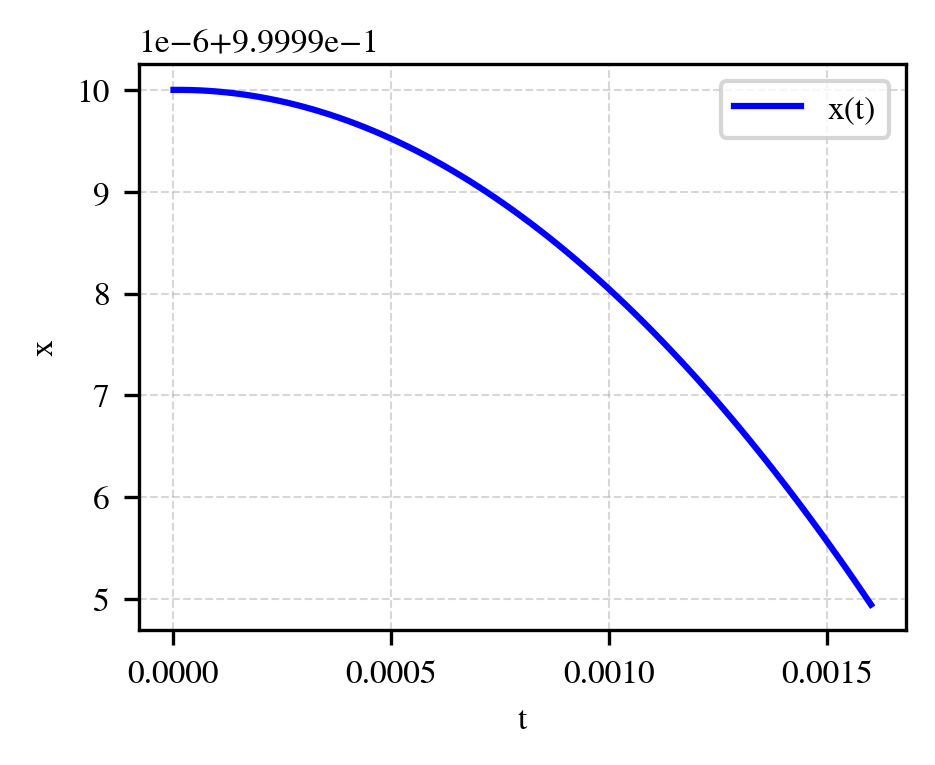

In [15]:
# a. Euler method

# Step size \Delta t = 2e-5
h = 2**(-5)

# Number of steps
n = int((tn - t0) / h)

ode_solver_h1 = ODE_solvers(f1, t0, x0, h, n)

# Solve ODE
t, x = ode_solver_h1.euler()

# Plot solution
fig1, ax1 = plt.subplots(dpi=300)
ax1.plot(t, x, 'b-', label='x(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.legend()
ax1.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# Store local truncation error \epsilon_1 = |x(t_1) - x_1|
error = np.zeros(n+1)
error[0] = 0
for i in range(n):
    error[i+1] = np.abs(exact1(t[i+1]) - x[i+1])

A1 = error[1]
A2 = error[-1]


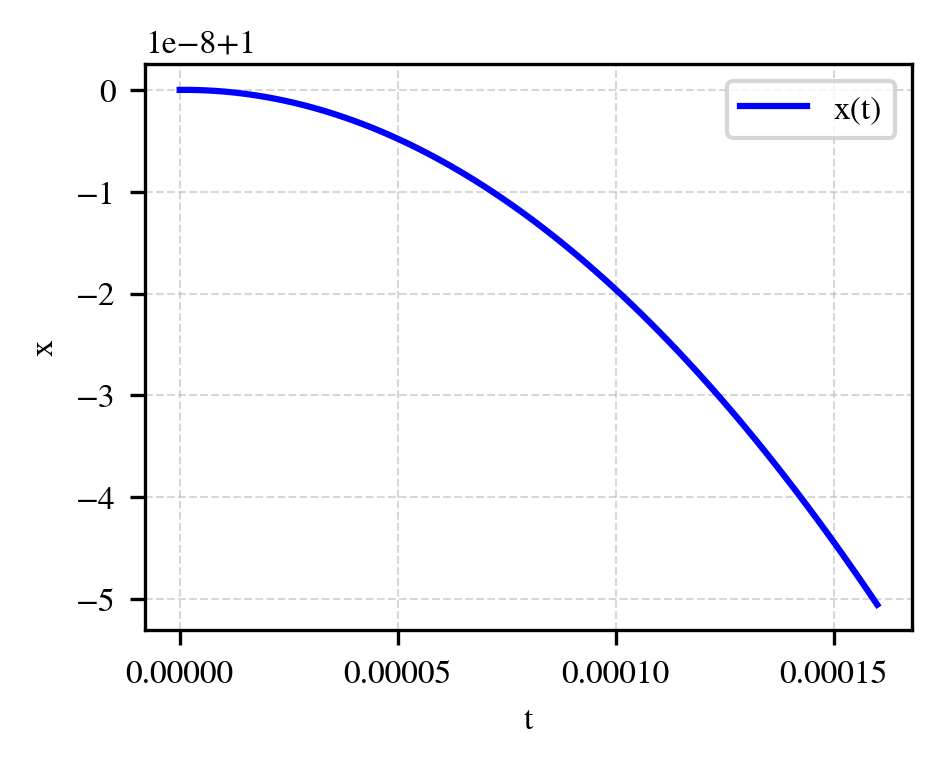

In [20]:
# Step size \Delta t = 2e-6
h = 2e-6

ode_solver_h2 = ODE_solvers(f1, t0, x0, h, n)

# Solve ODE
t, x = ode_solver_h2.euler()

# Plot solution
# fig1, ax1 = plt.subplots(dpi=300)
# ax1.plot(t, x, 'b-', label='x(t)')
# ax1.set_xlabel('t')
# ax1.set_ylabel('x')
# ax1.legend()
# ax1.grid(linestyle='--', linewidth=0.5, alpha=0.5)
# plt.show()

# Store local truncation error \epsilon_1 = |x(t_1) - x_1|
error = np.zeros(n+1)
error[0] = 0
for i in range(n):
    error[i+1] = np.abs(exact1(t[i+1]) - x[i+1])

A3 = error[1]
A4 = error[-1]

In [22]:
print('A1 = ', A1)
print('A2 = ', A2)
print('A3 = ', A3)
print('A4 = ', A4)

A1 =  8.000000661922968e-10
A2 =  6.399943286439225e-08
A3 =  7.999823026239028e-12
A4 =  6.399998309092325e-10


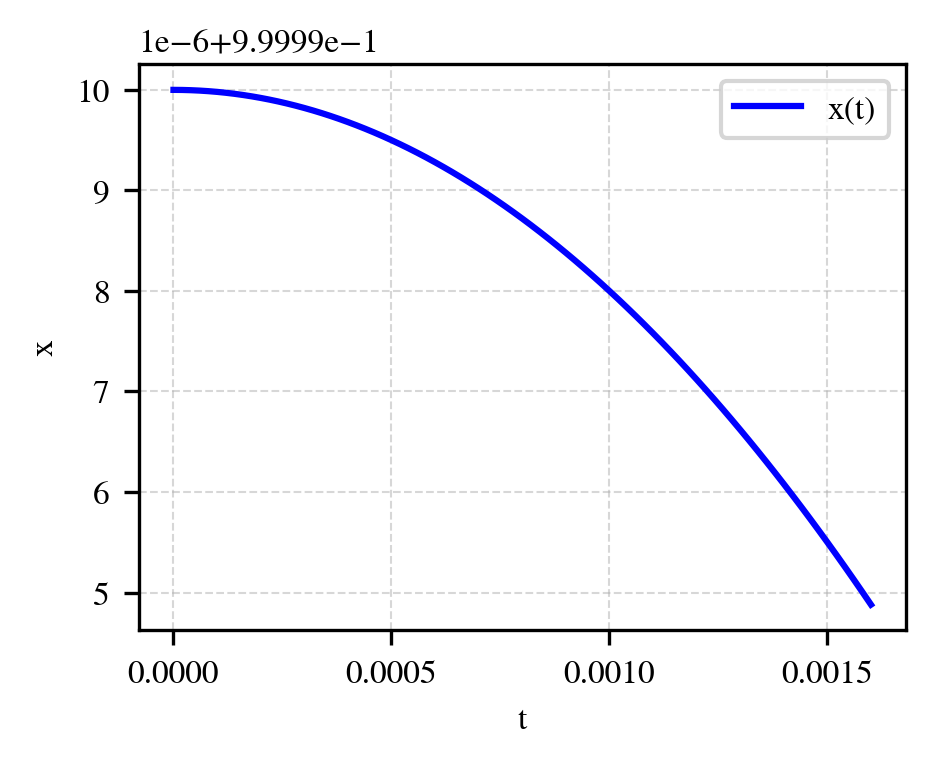

In [27]:
# b. Heun method

# Step size \Delta t = 2e-5
h = 2e-5

t, x = ode_solver_h1.heun()

# Plot solution
fig1, ax1 = plt.subplots(dpi=300)
ax1.plot(t, x, 'b-', label='x(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.legend()
ax1.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# Store local truncation error \epsilon_1 = |x(t_1) - x_1|
error = np.zeros(n+1)
error[0] = 0
for i in range(n):
    error[i+1] = np.abs(exact1(t[i+1]) - x[i+1])

A5 = error[1]
A6 = error[n]


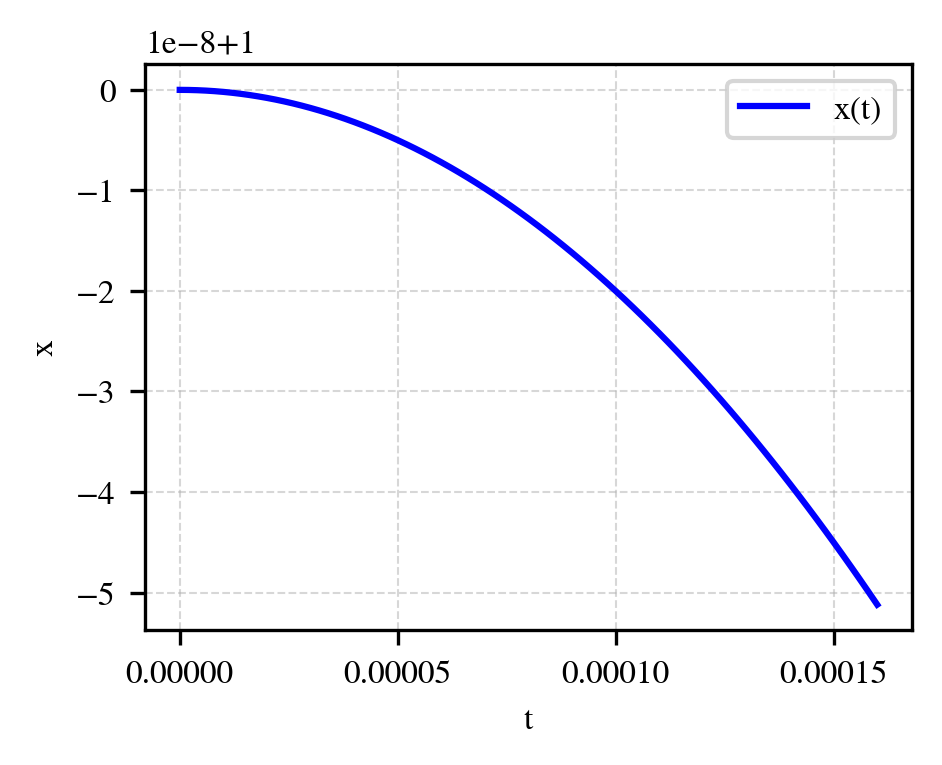

In [28]:
# b. Heun method

# Step size \Delta t = 2e-6
h = 2e-6

t, x = ode_solver_h2.heun()

# Plot solution
fig1, ax1 = plt.subplots(dpi=300)
ax1.plot(t, x, 'b-', label='x(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.legend()
ax1.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# Store local truncation error \epsilon_1 = |x(t_1) - x_1|
error = np.zeros(n+1)
error[0] = 0
for i in range(n):
    error[i+1] = np.abs(exact1(t[i+1]) - x[i+1])

A7 = error[1]
A8 = error[-1]

In [29]:
print('A5 = ', A5)
print('A6 = ', A6)
print('A7 = ', A7)
print('A8 = ', A8)

A5 =  1.1102230246251565e-16
A6 =  5.551115123125783e-16
A7 =  2.220446049250313e-16
A8 =  0.0


In [ ]:
# c. Runge-Kutta-2 method

# Step size \Delta t = 2e-5
h = 2e-5

t, x = ode_solver_h1.rk2()

# Plot solution
fig1, ax1 = plt.subplots(dpi=300)
ax1.plot(t, x, 'b-', label='x(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.legend()
ax1.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# Store local truncation error \epsilon_1 = |x(t_1) - x_1|
error = np.zeros(n+1)
error[0] = 0
for i in range(n):
    error[i+1] = np.abs(exact(t[i+1]) - x[i+1])

A9 = error[1]
A10 = error[n]

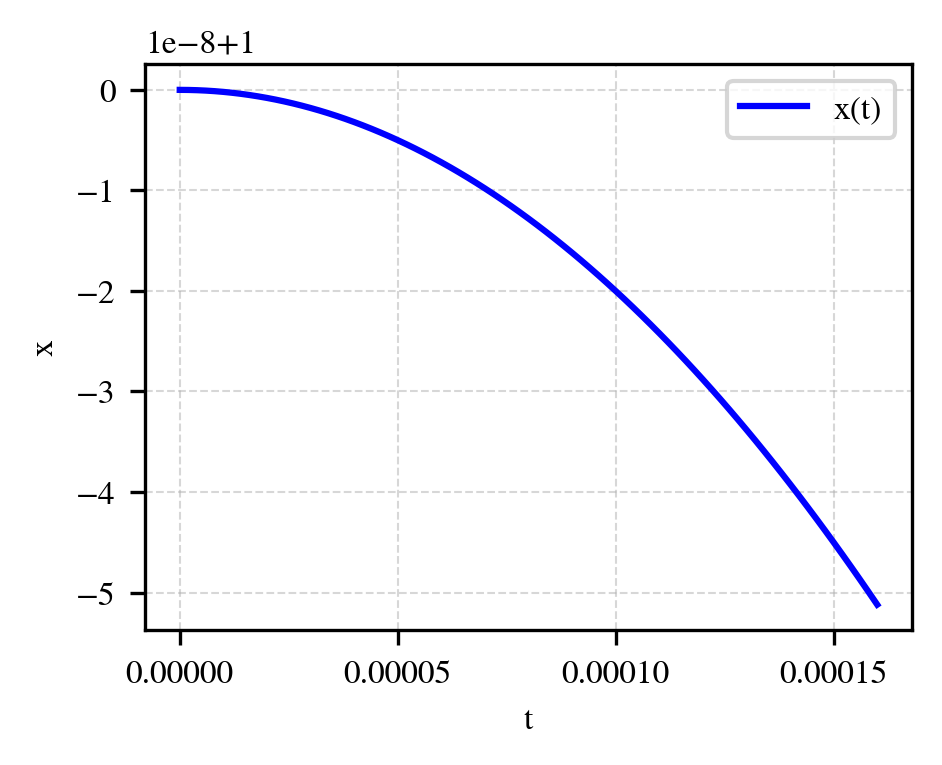

In [26]:
# c. Runge-Kutta-2 method

# Step size \Delta t = 2e-6
h = 2e-6

t, x = ode_solver_h2.rk2()

# Plot solution
fig1, ax1 = plt.subplots(dpi=300)
ax1.plot(t, x, 'b-', label='x(t)')
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.legend()
ax1.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# Store local truncation error \epsilon_1 = |x(t_1) - x_1|
error = np.zeros(n+1)
error[0] = 0
for i in range(n):
    error[i+1] = np.abs(exact(t[i+1]) - x[i+1])

A11 = error[1]
A12 = error[n]

In [ ]:
print('A9 = ', A9)
print('A10 = ', A10)
print('A11 = ', A11)
print('A12 = ', A12)

## Problem 2

In [46]:
class prob_2:
    def __init__(self,t0, x0, h, n):
        self.t0 = t0
        self.x0 = x0
        self.h = h
        self.n = n

    def f(self, t, x):
        return 8*np.sin(x)
    
    def exact(self, t):
        return 2*np.arctan(np.exp(8*t)/(1+np.sqrt(2)))
    
    def predictor_corrector(self):

        t = np.zeros(self.n+1)
        x = np.zeros(self.n+1)

        t[0] = self.t0
        x[0] = self.x0
        
        t[1] = self.t0 + self.h
        x[1] = self.x1_rk2()

        for i in range(1,self.n):
            
            k1 = self.f(t[i], x[i])
            t[i+1] = t[i] + self.h
            # Predictor
            x_p = x[i] + self.h/2 * (3*k1 - self.f(t[i-1], x[i-1]))
            # Corrector
            x[i+1] = x[i] + self.h/2 * (self.f(t[i+1], x_p) + k1)

        return t, x
    
    def x1_rk2(self):
        k1 = self.f(self.t0, self.x0)
        k2 = self.f(self.t0 + self.h/2, self.x0 + self.h/2 * k1)
        return self.x0 + self.h * k2

In [47]:
t0 = 0
x0 = np.pi/4

tn = 2

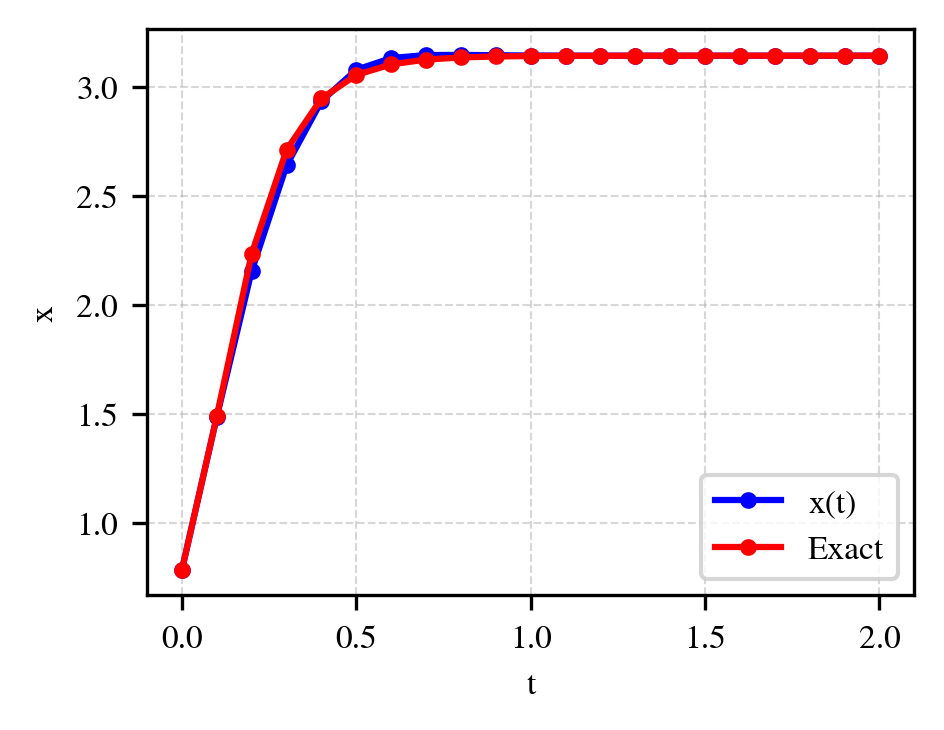

In [48]:
# Step size \Delta t = 0.1
h = 0.1

# Number of steps
n = int((tn - t0) / h)

prob2a_solver = prob_2(t0, x0, h, n)

# Solve ODE
t, x = prob2a_solver.predictor_corrector()

# Plot solution and exact solution
fig1, ax1 = plt.subplots(dpi=300)
ax1.plot(t, x, 'b-', label='x(t)', marker='o', markersize=3)
ax1.plot(t, prob2a_solver.exact(t), 'r-', label='Exact', marker='o', markersize=3)
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.legend()
ax1.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# Store final approximation x_n in variable A13
A13 = x[n]

# Store global error \epsilon_n = |x_n - x(t_n)| in variable A14
A14 = np.abs(x[n] - prob2a_solver.exact(t[n]))

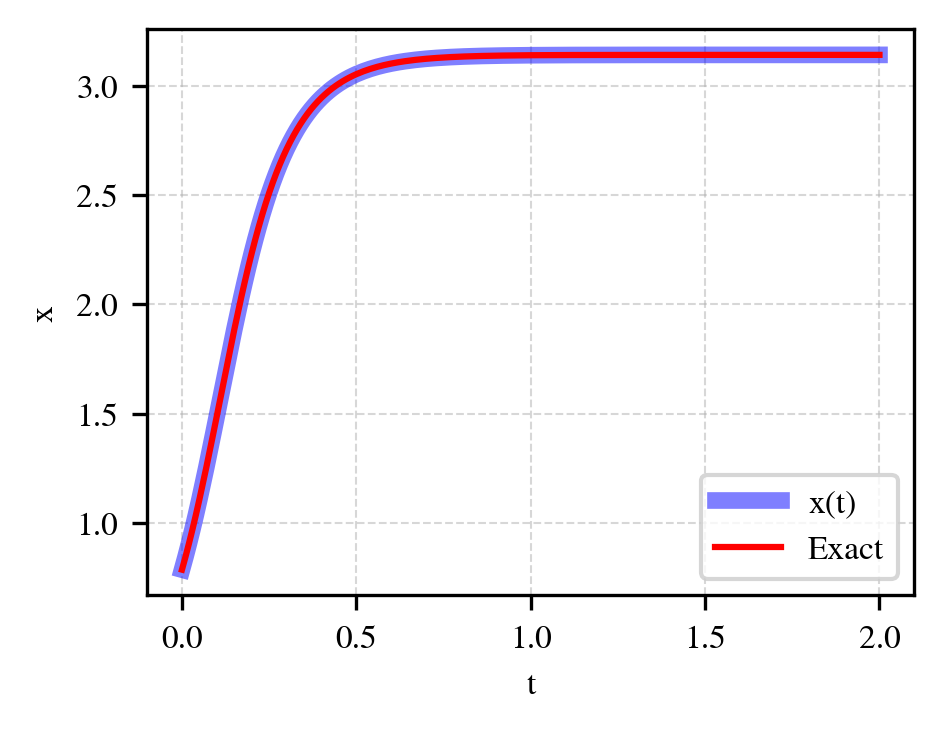

In [55]:
# Step size \Delta t = 0.01
h = 0.01

# Number of steps
n = int((tn - t0) / h)

prob2b_solver = prob_2(t0, x0, h, n)

# Solve ODE
t, x = prob2b_solver.predictor_corrector()

# Plot solution and exact solution
fig1, ax1 = plt.subplots(dpi=300)
ax1.plot(t, x, 'b-', label='x(t)',lw=4,alpha=0.5)
ax1.plot(t, prob2b_solver.exact(t), 'r-', label='Exact')
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.legend()
ax1.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# Store final approximation x_n in variable A13
A15 = x[n]

# Store global error \epsilon_n = |x_n - x(t_n)| in variable A14
A16 = np.abs(x[n] - prob2b_solver.exact(t[n]))

In [56]:
print('A13 = ', A13)
print('A14 = ', A14)
print('A15 = ', A15)
print('A16 = ', A16)

A13 =  3.141592735212949
A14 =  6.249910455835561e-07
A15 =  3.1415921148567025
A16 =  4.6347992110895575e-09


## Problem 3

In [16]:
a = 0.7
b = 1
tau = 12

t0 = 0
tn = 100

v0 = 0.1
w0 = 1

In [17]:
from scipy.integrate import solve_ivp as solve_ivp

In [18]:
def I(t):
    # external electrical current
    return 1/10*(5 + np.sin(np.pi*t/10))

In [19]:
def g(t,w,v,a,b,tau):
    # dw/dt
    return 1/tau*(a + v - b*w)

In [20]:
def f(t,v,w):
    # dv/dt = f(t,v,w)
    # dw/dt = g(t,v,w)
    return v - v**3/3 - w + I(t)

In [21]:
def sys_diff(t,sys_diff, constants):

    a,b,tau = constants
    v, w = sys_diff

    dvdt = f(t,v,w)
    dwdt = g(t,w,v,a,b,tau)

    return [dvdt, dwdt]

In [22]:
sys_initial = [v0,w0]

In [40]:
tspan = [t0,tn]
constants = (a,b,tau)
sol = solve_ivp(sys_diff, tspan, y0=sys_initial, args=(constants,), atol=1e-4, rtol=1e-4)
T = sol.t
(V, W) = sol.y

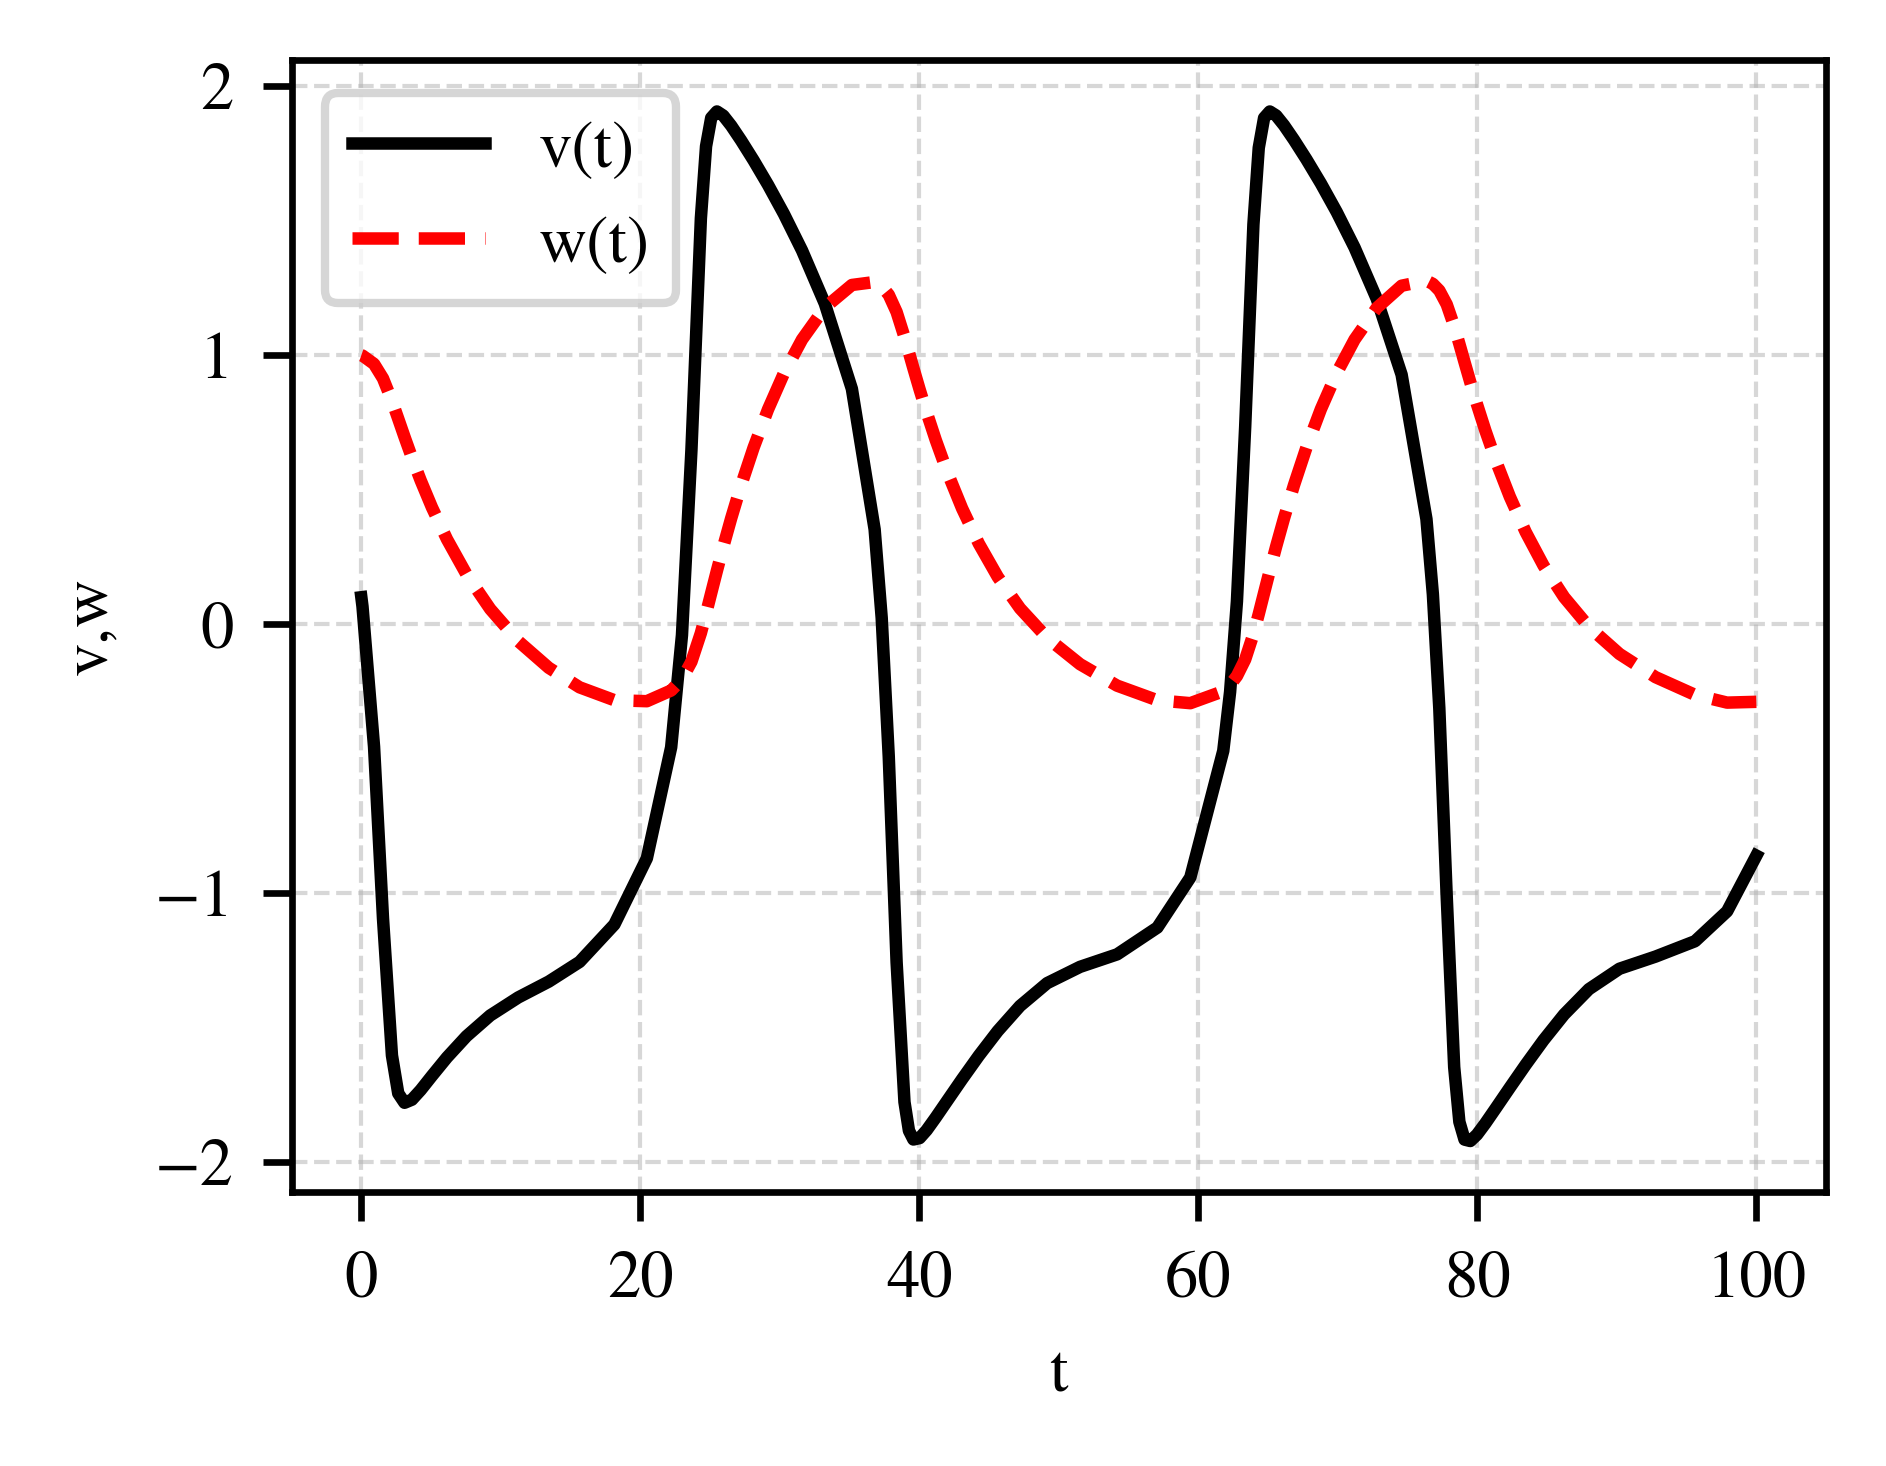

In [41]:
plt.plot(T,V, label='v(t)')
plt.plot(T,W, label='w(t)')
plt.xlabel('t')
plt.ylabel('v,w')
plt.legend()
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

In [42]:
average_time_step = np.mean(np.diff(T))

In [43]:
A17 = V[-1]
A18 = average_time_step

In [44]:
print('A17 = ', A17)
print('A18 = ', A18)

A17 =  -0.8607958606932129
A18 =  1.098901098901099


#### Part b.

In [33]:
tspan = [t0,tn]
constants = (a,b,tau)
sol = solve_ivp(sys_diff, tspan, y0=sys_initial, args=(constants,), atol=1e-9, rtol=1e-9)
T = sol.t
(V, W) = sol.y

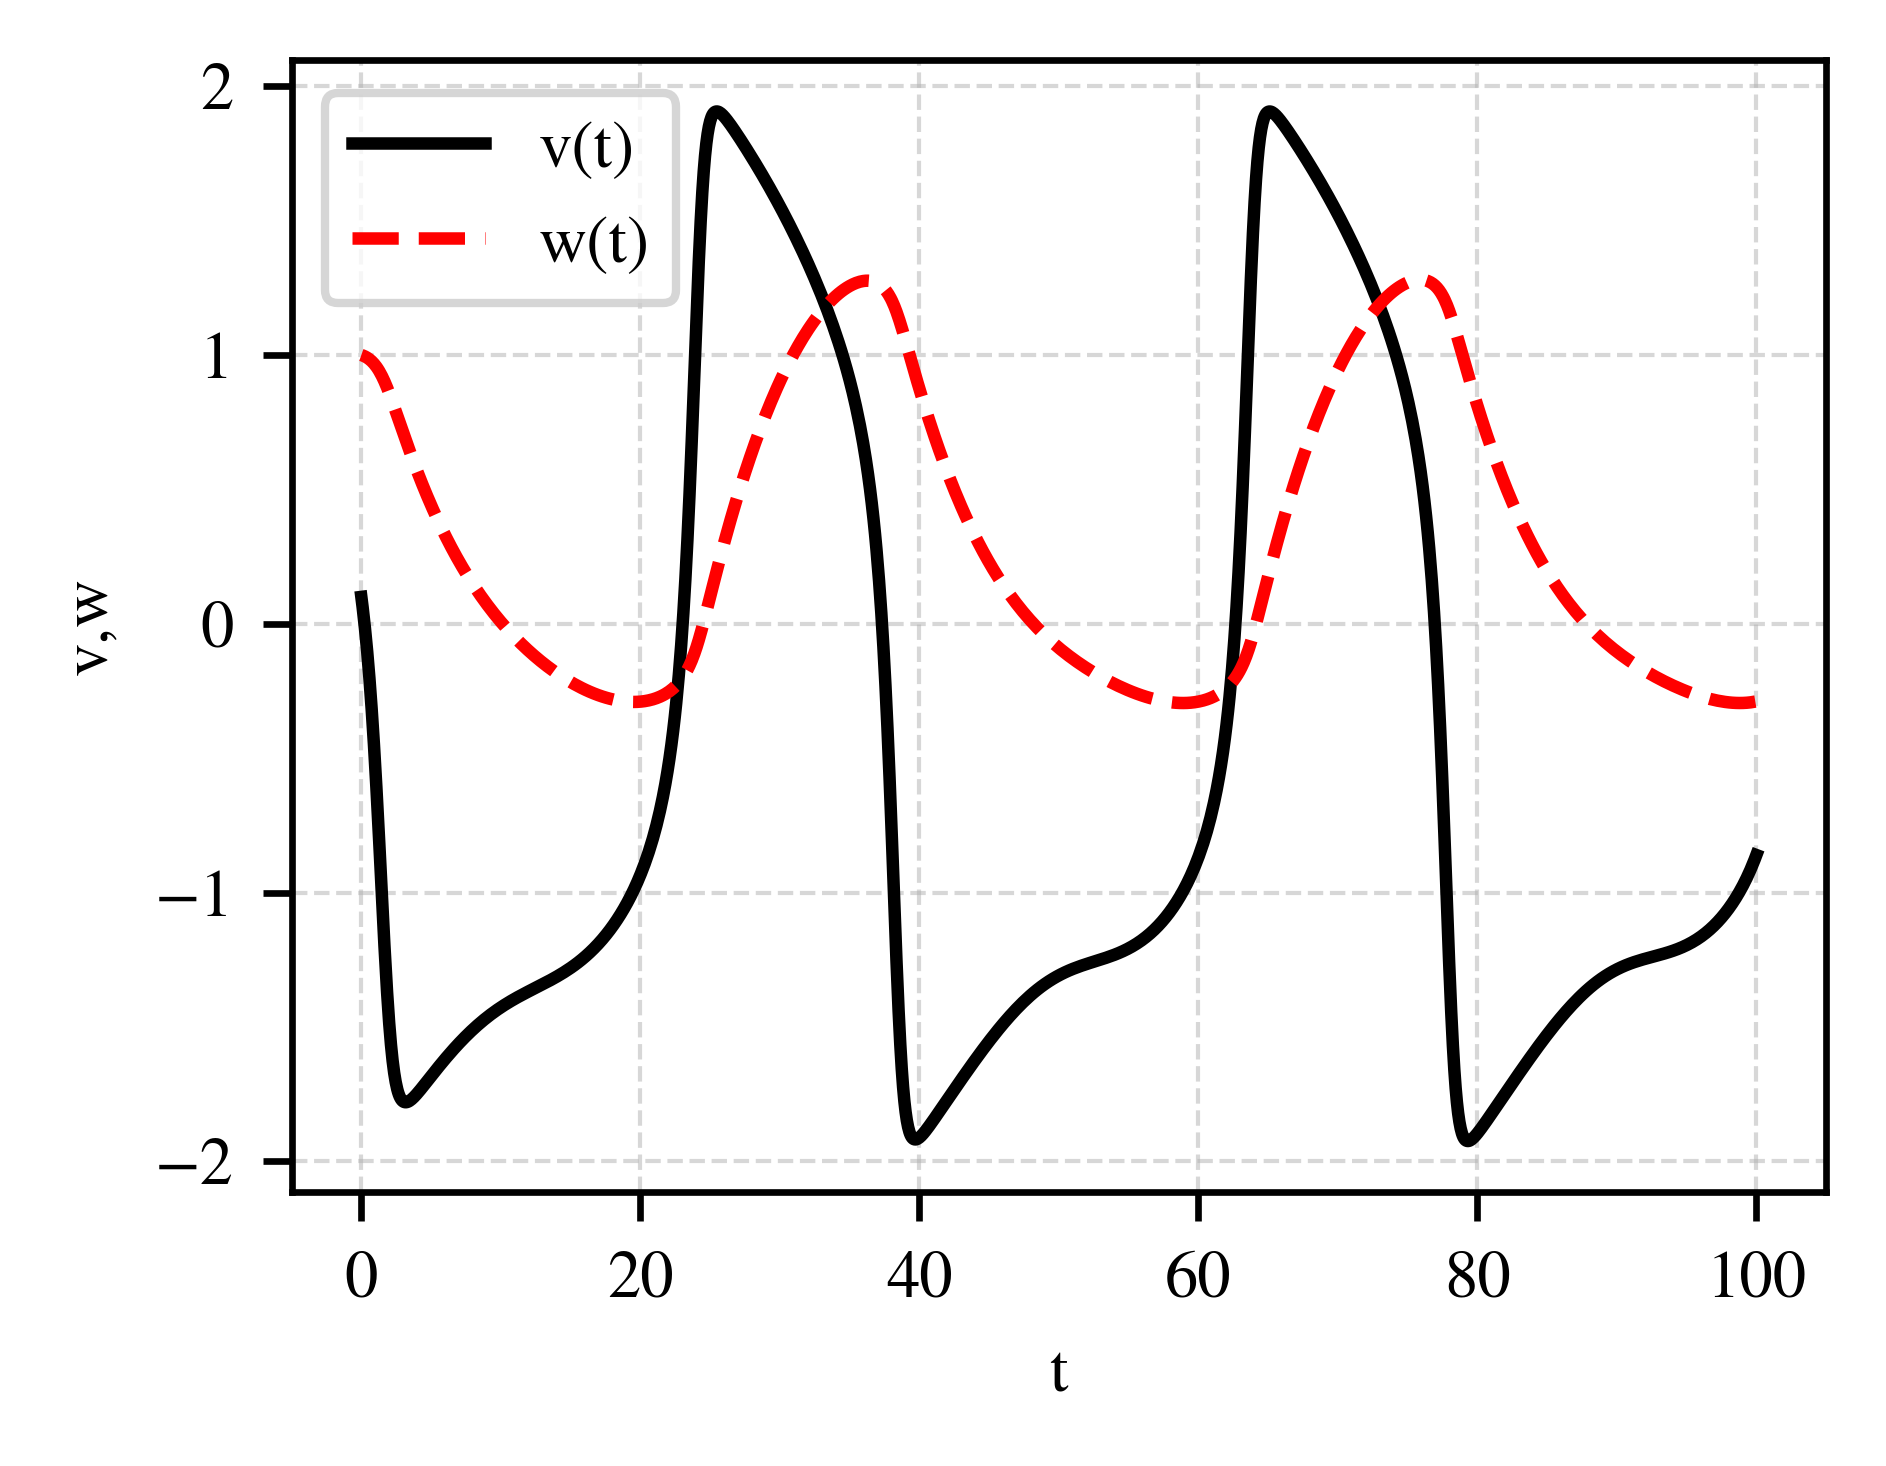

In [34]:
plt.plot(T,V, label='v(t)')
plt.plot(T,W, label='w(t)')
plt.xlabel('t')
plt.ylabel('v,w')
plt.legend()
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

In [35]:
average_time_step = np.mean(np.diff(T))

In [38]:
A19 = V[-1]
A20 = average_time_step

In [39]:
print('A19 = ', A19)
print('A20 = ', A20)

A19 =  -0.8603788514052567
A20 =  0.14347202295552366


## Report

In [1]:
import numpy as np
from scipy.integrate import solve_ivp as solve_ivp
import matplotlib.pyplot as plt
import matplotlib
import scienceplots

In [2]:
## Set graphing properties

# matplotlib.rcParams['font.sans-serif'] = ['Arial'] # Helvetica
# plt.rcParams["figure.figsize"] = (16,7)

# SMALL_SIZE = 16
# MEDIUM_SIZE = 18
# BIGGER_SIZE = 20

# plt.rcParams['axes.facecolor']='white'
# plt.rcParams['savefig.facecolor']='white'
# plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use(['ieee'])

Slope of the line is  0.908944955388295


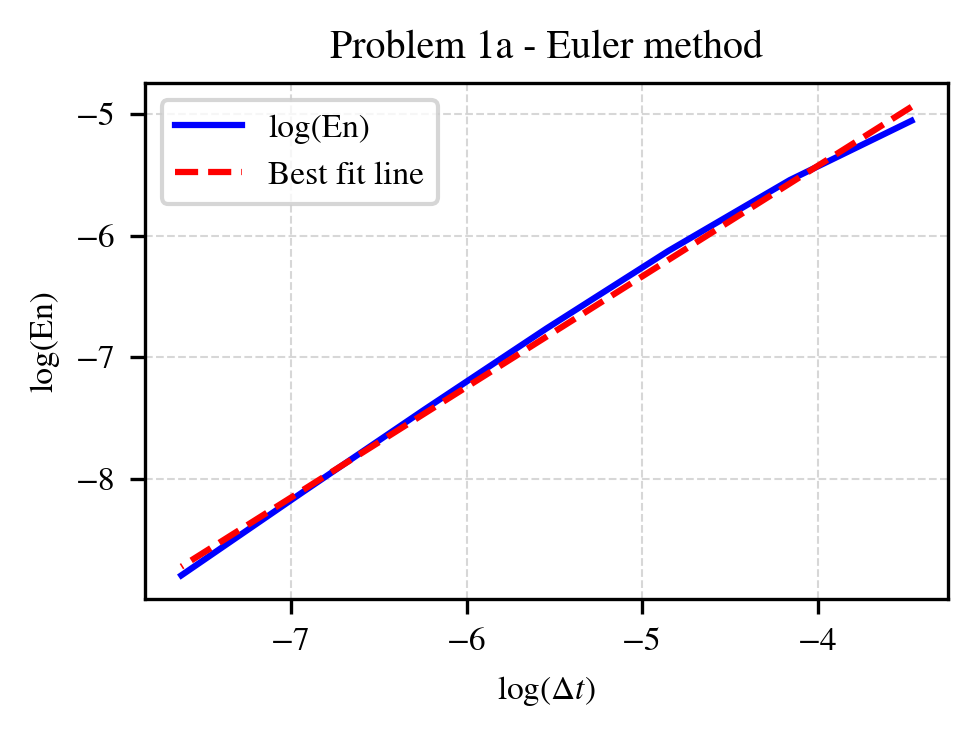

In [19]:
## Problem 1

class ODE_solvers:
    def __init__(self, f, t0, x0, h, n):
        self.f = f
        self.t0 = t0
        self.x0 = x0
        self.h = h
        self.n = n

    # Euler method for solving ODE
    def euler(self):
        t = np.zeros(self.n+1)
        x = np.zeros(self.n+1)
        t[0] = self.t0
        x[0] = self.x0
        for i in range(self.n):
            x[i+1] = x[i] + self.h * self.f(t[i], x[i])
            t[i+1] = t[i] + self.h
        return t, x

    # Heun method for solving ODE
    def heun(self):
        t = np.zeros(self.n+1)
        x = np.zeros(self.n+1)
        t[0] = self.t0
        x[0] = self.x0
        for i in range(self.n):
            x[i+1] = x[i] + self.h/2 * (self.f(t[i], x[i]) + self.f(t[i] + self.h, x[i] + self.h * self.f(t[i], x[i])))
            t[i+1] = t[i] + self.h
        return t, x

    # Runge-Kutta-2 method for solving ODE
    def rk2(self):
        t = np.zeros(self.n+1)
        x = np.zeros(self.n+1)
        t[0] = self.t0
        x[0] = self.x0
        for i in range(self.n):
            k1 = self.f(t[i], x[i])
            k2 = self.f(t[i] + self.h/2, x[i] + self.h/2 * k1)
            x[i+1] = x[i] + self.h * k2
            t[i+1] = t[i] + self.h
        return t, x
    

# Function to solve
def f1(t, x):
    return -4*x*np.sin(t)

# Exact solution of ODE is x(t) = e^(4*cos(t) - 1)
def exact1(t):
    return np.exp(4*(np.cos(t) - 1))

## Problem 1a

# Initial conditions x(0) = 1
t0 = 0
x0 = 1
tn = 8

exp_range = [5,6,7,8,9,10,11]
step_sizes = [2**(-idx) for idx in exp_range]
error_global = []

for h in step_sizes:
    # Number of steps
    n = int((tn - t0) / h)
    # a. Euler method

    ode_solver_h1 = ODE_solvers(f1, t0, x0, h, n)

    # Solve ODE
    t, x = ode_solver_h1.euler()

    # Store local truncation error \epsilon_1 = |x(t_1) - x_1|
    error = np.zeros(n+1)
    error[0] = 0
    for i in range(n):
        error[i+1] = np.abs(exact1(t[i+1]) - x[i+1])
    En = error[n]
    error_global.append(En)

log_En = np.log(error_global)
log_h = np.log(step_sizes)

# Fit a line to the log-log plot
coeffs = np.polyfit(log_h, log_En, 1)
poly = np.poly1d(coeffs)
print('Slope of the line is ', coeffs[0])

# Plot log-log plot
fig1, ax1 = plt.subplots(dpi=300)
ax1.plot(log_h, log_En, 'b-', label='log(En)')
ax1.plot(log_h, poly(log_h), 'r--', label='Best fit line')
ax1.set_xlabel('log($\Delta t$)')
ax1.set_ylabel('log(En)')
ax1.set_title('Problem 1a - Euler method')
ax1.legend()
ax1.grid(linestyle='--', linewidth=0.5, alpha=0.5)
# plt.show()
plt.tight_layout()
plt.savefig('Problem_1a.png', dpi=300)

Slope of the line is  2.0599552814134703


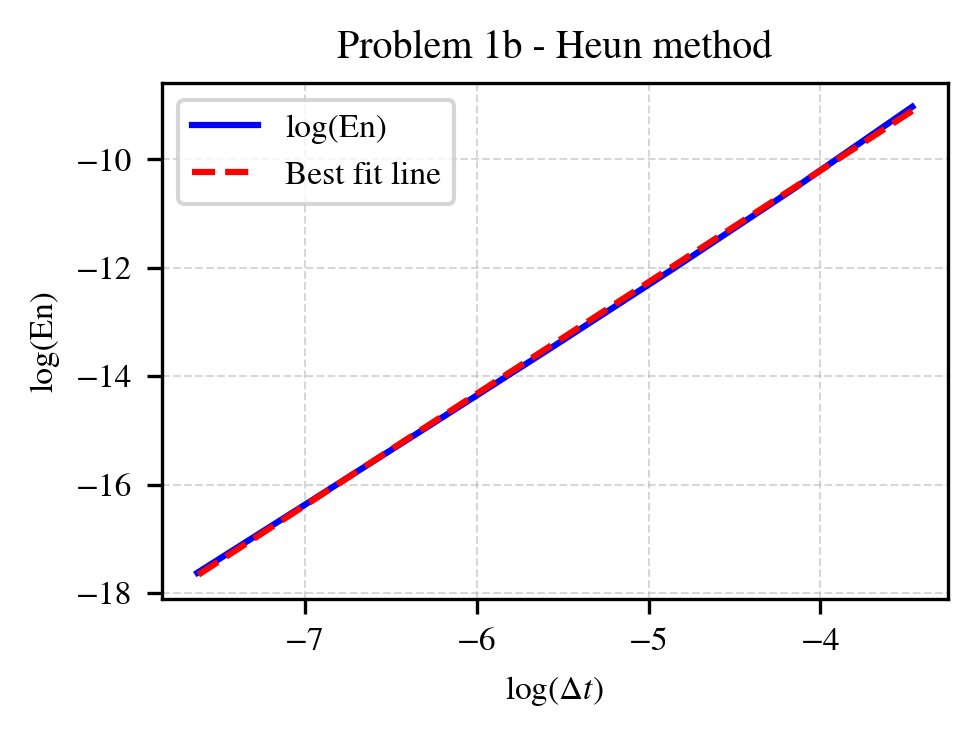

In [20]:
exp_range = [5,6,7,8,9,10,11]
step_sizes = [2**(-idx) for idx in exp_range]
error_global = []

for h in step_sizes:
    # Number of steps
    n = int((tn - t0) / h)

    ode_solver_h1 = ODE_solvers(f1, t0, x0, h, n)

    # Solve ODE
    t, x = ode_solver_h1.heun()

    # Store local truncation error \epsilon_1 = |x(t_1) - x_1|
    error = np.zeros(n+1)
    error[0] = 0
    for i in range(n):
        error[i+1] = np.abs(exact1(t[i+1]) - x[i+1])
    En = error[n]
    error_global.append(En)

log_En = np.log(error_global)
log_h = np.log(step_sizes)

# Fit a line to the log-log plot
coeffs = np.polyfit(log_h, log_En, 1)
poly = np.poly1d(coeffs)
print('Slope of the line is ', coeffs[0])

# Plot log-log plot
fig1, ax1 = plt.subplots(dpi=300)
ax1.plot(log_h, log_En, 'b-', label='log(En)')
ax1.plot(log_h, poly(log_h), 'r--', label='Best fit line')
ax1.set_xlabel('log($\Delta t$)')
ax1.set_ylabel('log(En)')
ax1.set_title('Problem 1b - Heun method')
ax1.legend()
ax1.grid(linestyle='--', linewidth=0.5, alpha=0.5)
# plt.show()
plt.tight_layout()
plt.savefig('Problem_1b.png', dpi=300)

Slope of the line is  2.078195221374843


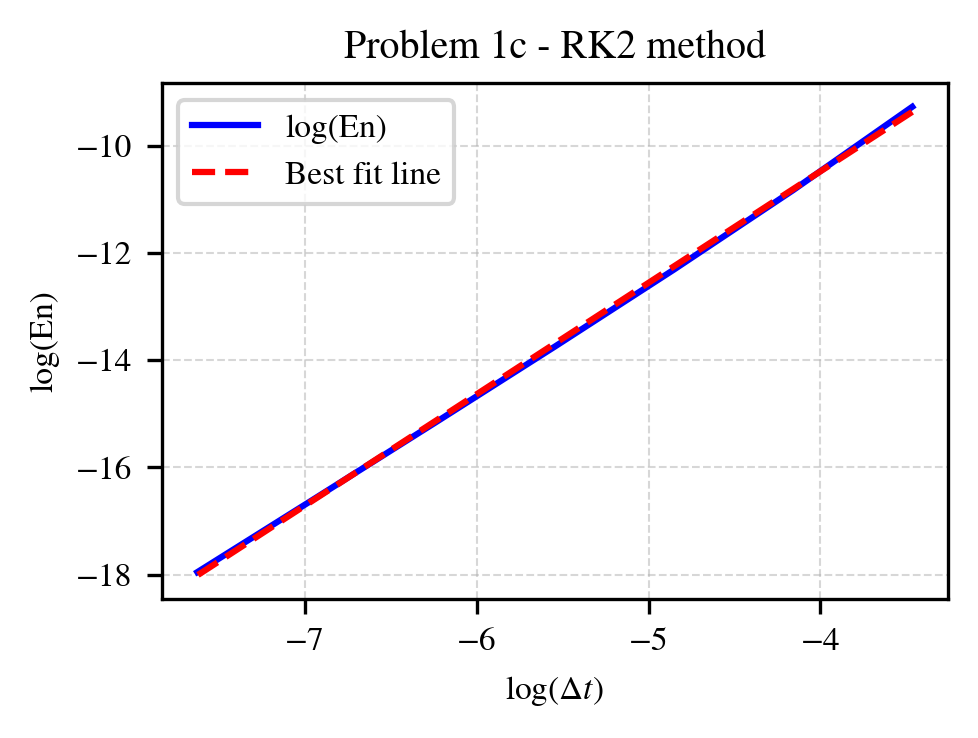

In [21]:
exp_range = [5,6,7,8,9,10,11]
step_sizes = [2**(-idx) for idx in exp_range]
error_global = []

for h in step_sizes:
    # Number of steps
    n = int((tn - t0) / h)

    ode_solver_h1 = ODE_solvers(f1, t0, x0, h, n)

    # Solve ODE
    t, x = ode_solver_h1.rk2()

    # Store local truncation error \epsilon_1 = |x(t_1) - x_1|
    error = np.zeros(n+1)
    error[0] = 0
    for i in range(n):
        error[i+1] = np.abs(exact1(t[i+1]) - x[i+1])
    En = error[n]
    error_global.append(En)

log_En = np.log(error_global)
log_h = np.log(step_sizes)

# Fit a line to the log-log plot
coeffs = np.polyfit(log_h, log_En, 1)
poly = np.poly1d(coeffs)
print('Slope of the line is ', coeffs[0])

# Plot log-log plot
fig1, ax1 = plt.subplots(dpi=300)
ax1.plot(log_h, log_En, 'b-', label='log(En)')
ax1.plot(log_h, poly(log_h), 'r--', label='Best fit line')
ax1.set_xlabel('log($\Delta t$)')
ax1.set_ylabel('log(En)')
ax1.set_title('Problem 1c - RK2 method')
ax1.legend()
ax1.grid(linestyle='--', linewidth=0.5, alpha=0.5)
# plt.show()
plt.tight_layout()
plt.savefig('Problem_1c.png', dpi=300)